In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import json
import configparser

In [9]:
with open('game_data_structure.json', 'r') as f:
    game_data_structure = json.load(f)
    
db_config = configparser.ConfigParser()
db_config.read('../pg_database.conf')
connection = psycopg2.connect(host = db_config["DEFAULT"]["db_host"], 
                              port = db_config["DEFAULT"]["db_port"], 
                              database = db_config["DEFAULT"]["db_database"], 
                              user = db_config["DEFAULT"]["db_user"], 
                              password = db_config["DEFAULT"]["db_password"]
                              )

In [14]:
raw_historical_games = pd.read_sql("SELECT * FROM raw_historical_games", connection)

In [21]:
raw_historical_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30605 entries, 0 to 30604
Columns: 144 entries, gameid to updated_date
dtypes: bool(1), float64(27), int64(45), object(71)
memory usage: 33.4+ MB


In [24]:
raw_historical_games.dtypes

gameid                                                   object
gamecode                                                 object
gamestatus                                                int64
gamestatustext                                           object
period                                                    int64
                                                         ...   
broadcasters_awaytvbroadcasters_1_broadcastdisplay       object
broadcasters_nationalbroadcasters_1_broadcasterid       float64
broadcasters_nationalbroadcasters_1_broadcastdisplay     object
created_date                                             object
updated_date                                             object
Length: 144, dtype: object

In [27]:
raw_historical_games.columns

Index(['gameid', 'gamecode', 'gamestatus', 'gamestatustext', 'period',
       'gameclock', 'gametimeutc', 'gameet', 'regulationperiods',
       'seriesgamenumber',
       ...
       'recap_entitlements', 'recap_videoduration', 'recap_excerpt',
       'recap_featuredimage',
       'broadcasters_awaytvbroadcasters_1_broadcasterid',
       'broadcasters_awaytvbroadcasters_1_broadcastdisplay',
       'broadcasters_nationalbroadcasters_1_broadcasterid',
       'broadcasters_nationalbroadcasters_1_broadcastdisplay', 'created_date',
       'updated_date'],
      dtype='object', length=144)


In [38]:
raw_historical_games.shape

(30605, 144)

In [45]:
raw_historical_games.isna().sum(axis=0)

gameid                                                     0
gamecode                                                   0
gamestatus                                                 0
gamestatustext                                             0
period                                                     0
                                                        ... 
broadcasters_awaytvbroadcasters_1_broadcastdisplay      4973
broadcasters_nationalbroadcasters_1_broadcasterid       9114
broadcasters_nationalbroadcasters_1_broadcastdisplay    9114
created_date                                               0
updated_date                                               0
Length: 144, dtype: int64

In [46]:
raw_historical_games.isna().sum(axis=0)<(raw_historical_games.shape[0]*0.5)

gameid                                                  True
gamecode                                                True
gamestatus                                              True
gamestatustext                                          True
period                                                  True
                                                        ... 
broadcasters_awaytvbroadcasters_1_broadcastdisplay      True
broadcasters_nationalbroadcasters_1_broadcasterid       True
broadcasters_nationalbroadcasters_1_broadcastdisplay    True
created_date                                            True
updated_date                                            True
Length: 144, dtype: bool

In [50]:
raw_historical_games.shape[0]

30605

In [49]:
raw_historical_games.columns

Index(['gameid', 'gamecode', 'gamestatus', 'gamestatustext', 'period',
       'gameclock', 'gametimeutc', 'gameet', 'regulationperiods',
       'seriesgamenumber',
       ...
       'recap_entitlements', 'recap_videoduration', 'recap_excerpt',
       'recap_featuredimage',
       'broadcasters_awaytvbroadcasters_1_broadcasterid',
       'broadcasters_awaytvbroadcasters_1_broadcastdisplay',
       'broadcasters_nationalbroadcasters_1_broadcasterid',
       'broadcasters_nationalbroadcasters_1_broadcastdisplay', 'created_date',
       'updated_date'],
      dtype='object', length=144)

In [54]:
raw_historical_games.columns[raw_historical_games.isna().sum(axis=0)<(raw_historical_games.shape[0]*0.1)]

Index(['gameid', 'gamecode', 'gamestatus', 'gamestatustext', 'period',
       'gameclock', 'gametimeutc', 'gameet', 'regulationperiods',
       'seriesgamenumber',
       ...
       'broadcasters_awayradiobroadcasters_2_broadcasterid',
       'broadcasters_awayradiobroadcasters_2_broadcastdisplay',
       'hometeam_periods_6_period', 'hometeam_periods_6_periodtype',
       'hometeam_periods_6_score', 'awayteam_periods_6_period',
       'awayteam_periods_6_periodtype', 'awayteam_periods_6_score',
       'created_date', 'updated_date'],
      dtype='object', length=131)

In [70]:
core_columns = ['gameId',
  'gameCode',
  'gameLeaders_homeLeaders_personId',
  'gameLeaders_homeLeaders_name',
  'gameLeaders_homeLeaders_jerseyNum',
  'gameLeaders_homeLeaders_position',
  'gameLeaders_homeLeaders_teamTricode',
  'gameLeaders_homeLeaders_points',
  'gameLeaders_homeLeaders_rebounds',
  'gameLeaders_homeLeaders_assists',
  'gameLeaders_awayLeaders_personId',
  'gameLeaders_awayLeaders_name',
  'gameLeaders_awayLeaders_jerseyNum',
  'gameLeaders_awayLeaders_position',
  'gameLeaders_awayLeaders_teamTricode',
  'gameLeaders_awayLeaders_points',
  'gameLeaders_awayLeaders_rebounds',
  'gameLeaders_awayLeaders_assists',
  'homeTeam_teamId',
  'homeTeam_teamName',
  'homeTeam_teamCity',
  'homeTeam_teamTricode',
  'homeTeam_wins',
  'homeTeam_losses',
  'homeTeam_score',
  'homeTeam_seed',
  'homeTeam_timeoutsRemaining',
  'awayTeam_teamId',
  'awayTeam_teamName',
  'awayTeam_teamCity',
  'awayTeam_teamTricode',
  'awayTeam_wins',
  'awayTeam_losses',
  'awayTeam_score',
  'awayTeam_seed',
  'awayTeam_timeoutsRemaining']
core_columns = [word.lower() for word in core_columns]

In [71]:
raw_historical_games[core_columns]

,gameid,gamecode,gameleaders_homeleaders_personid,gameleaders_homeleaders_name,gameleaders_homeleaders_jerseynum,gameleaders_homeleaders_position,gameleaders_homeleaders_teamtricode,gameleaders_homeleaders_points,gameleaders_homeleaders_rebounds,gameleaders_homeleaders_assists,...,hometeam_timeoutsremaining,awayteam_teamid,awayteam_teamname,awayteam_teamcity,awayteam_teamtricode,awayteam_wins,awayteam_losses,awayteam_score,awayteam_seed,awayteam_timeoutsremaining
0,0020901029,20100320/CHIPHI,201578,Marreese Speights,16,F-C,PHI,17,11,0,...,1,1610612741,Bulls,Chicago,CHI,32,37,98,0.0,1
1,0020901030,20100320/CHAMIA,2548,Dwyane Wade,3,G,MIA,14,5,9,...,0,1610612766,Bobcats,Charlotte,CHA,35,34,71,0.0,0
2,0020900474,20100101/NYKATL,201143,Al Horford,15,C,ATL,22,19,4,...,0,1610612752,Knicks,New York,NYK,13,20,112,0.0,1
3,0020900475,20100101/ORLMIN,201567,Kevin Love,42,F-C,MIN,17,10,1,...,0,1610612753,Magic,Orlando,ORL,24,8,106,0.0,1
4,0020900476,20100101/SACLAL,977,Kobe Bryant,24,G,LAL,39,5,5,...,0,1610612758,Kings,Sacramento,SAC,14,18,108,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30600,0020900469,20091231/CHIDET,201155,Rodney Stuckey,3,G,DET,22,3,6,...,1,1610612741,Bulls,Chicago,CHI,13,17,98,0.0,1
30601,0020900470,20091231/DALHOU,201166,Aaron Brooks,0,G,HOU,30,4,4,...,1,1610612742,Mavericks,Dallas,DAL,22,10,94,0.0,0
30602,0020900471,20091231/MIASAS,1495,Tim Duncan,21,F,SAS,23,10,3,...,1,1610612748,Heat,Miami,MIA,16,14,78,0.0,1
30603,0020900472,20091231/UTAOKC,201142,Kevin Durant,35,F,OKC,31,9,5,...,0,1610612762,Jazz,Utah,UTA,18,14,86,0.0,0


In [69]:
raw_historical_games.awayteam_seed.describe()

count    30598.000000
mean         0.216550
std          1.014377
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: awayteam_seed, dtype: float64

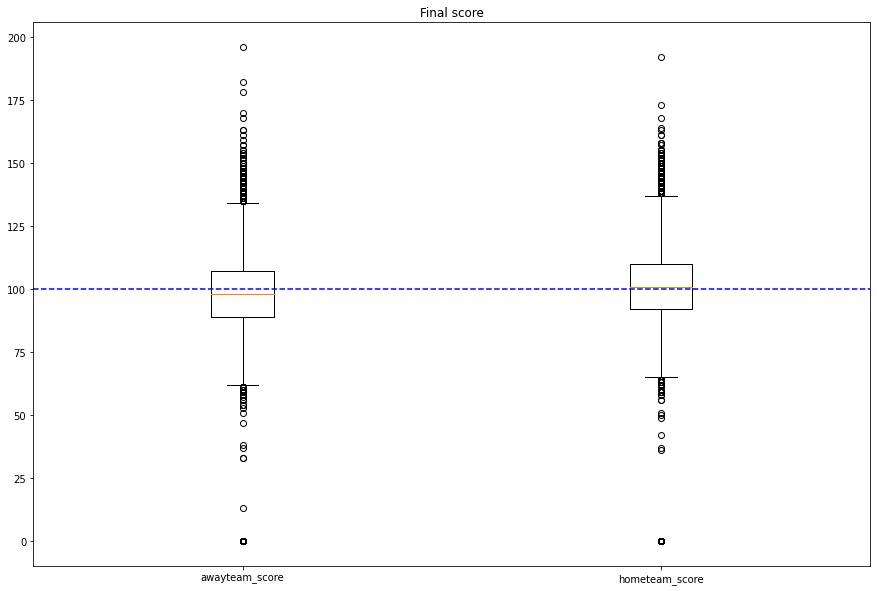

In [94]:
plt.figure(figsize=(15,10))
plt.boxplot(raw_historical_games[["awayteam_score", "hometeam_score"]])
plt.xticks((1,2), ("awayteam_score", "hometeam_score"))
plt.axhline(y=100, color='b', linestyle='--')
plt.title("Final score")
plt.show()